In [10]:
#Classification between  the digits 1 and 7 i.e. Neural Networks only with one output class
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
df=datasets.load_digits()

In [12]:
#To choose only those data points which have either 1 or 7 as output from the whole dataset
x=[]
y=[]
for i in range(df.target.shape[0]):
    if df.target[i]==1:
        df.target[i]=0
        y.append(df.target[i])
        x.append(df.data[i])
    elif df.target[i]==7:
        df.target[i]=1
        y.append(df.target[i])
        x.append(df.data[i])
        

In [13]:
x=np.array((x))
y=np.array((y))

In [14]:
x.shape,y.shape

((361, 64), (361,))

In [15]:
#Splitting the data into training and testing data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape,y_test

((270, 64),
 (91, 64),
 (270,),
 (91,),
 array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 1]))

In [16]:
x_train_images=x_train.reshape(270,8,8)
x_test_images=x_test.reshape(91,8,8)

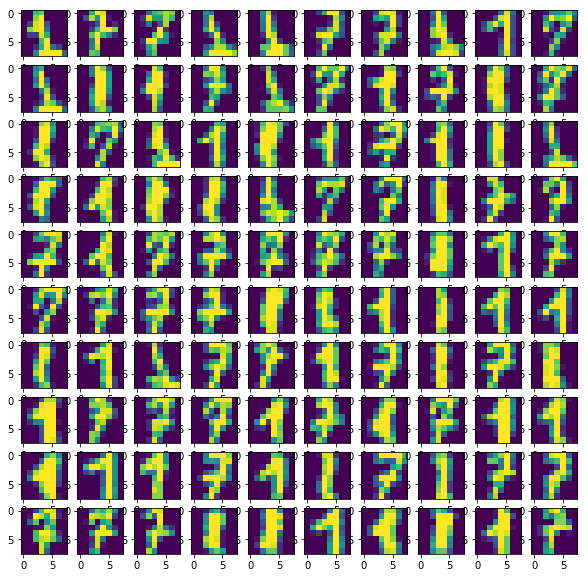

In [17]:
#Plotting some training images (First 100)
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(x_train_images[i])

plt.show()

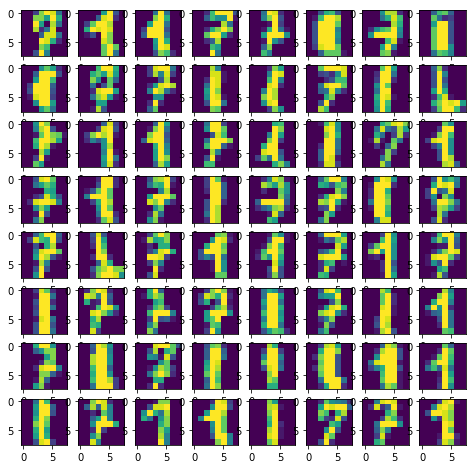

In [18]:
#Plotting some test images (First 64)
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_test_images[i])
    
plt.show()

In [19]:
y_train=y_train.reshape(-1,1)

In [20]:
scaler=StandardScaler()

In [21]:
#The data is scaled using StandardScaler
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
#Code considering 20 units in hidden_layer1 , 10 units in hidden_layer2 , 15 units in hidden_layer3 and 1 unit in output_layer
wh1=2*(np.random.random((64,20)))-1    
bh1=2*(np.random.random((1,20)))-1 
wh2=2*(np.random.random((20,10)))-1    
bh2=2*(np.random.random((1,10)))-1     
wh3=2*(np.random.random((10,15)))-1    
bh3=2*(np.random.random((1,15)))-1     
wo=2*(np.random.random((15,1)))-1
bo=2*(np.random.random((1,1)))-1 


In [23]:
#Function to calculate the sigmoid 
def sig(z):
    return 1/(1+np.exp(-z))

In [24]:
#Function to calculate the derivative of sigmoid function
def dsig(z):
    return sig(z)*(1-sig(z))

In [25]:
#Function performing FORWARD PROPAGATION
def forward(x,wh3,wh2,wh1,wo,bh3,bh2,bh1,bo):
    output0=x
    hidden_layer_input_1=np.dot(output0,wh1)+bh1
    hidden_layer_output_1=sig(hidden_layer_input_1)
    hidden_layer_input_2=np.dot(hidden_layer_output_1,wh2)+bh2
    hidden_layer_output_2=sig(hidden_layer_input_2)
    hidden_layer_input_3=np.dot(hidden_layer_output_2,wh3)+bh3
    hidden_layer_output_3=sig(hidden_layer_input_3)
    output_layer_input=np.dot(hidden_layer_output_3,wo)+bo
    output=sig(output_layer_input)
    return output
    

In [26]:
#Function performing FORWARD AND BACKWARD PROPAGATION to reduce the error and find the best weights and biases. 
def train(x,y,wh3,wh2,wh1,wo,bh3,bh2,bh1,bo,iterations,lr):
    for i in range(iterations):
        output0=x
        hidden_layer_input_1=np.dot(output0,wh1)+bh1
        hidden_layer_output_1=sig(hidden_layer_input_1)
        hidden_layer_input_2=np.dot(hidden_layer_output_1,wh2)+bh2
        hidden_layer_output_2=sig(hidden_layer_input_2)
        hidden_layer_input_3=np.dot(hidden_layer_output_2,wh3)+bh3
        hidden_layer_output_3=sig(hidden_layer_input_3)
        output_layer_input=np.dot(hidden_layer_output_3,wo)+bo
        output=sig(output_layer_input)

        first_term_output=output-y
        second_term_output=dsig(output_layer_input)
        first_two_terms_output =  first_term_output * second_term_output
        second_term_hidden_layer_3 = dsig(hidden_layer_input_3)
        first_term_hidden_layer_3 = np.dot(first_two_terms_output,wo.T)
        first_two_terms_hidden_3 = first_term_hidden_layer_3 * second_term_hidden_layer_3

        changes_wo=np.dot(hidden_layer_output_3.T,first_two_terms_output) 
        changes_wh3=np.dot(hidden_layer_output_2.T,first_two_terms_hidden_3) 
        wh3=wh3-lr*changes_wh3
        wo=wo-lr*changes_wo


        second_term_hidden_layer_2 = dsig(hidden_layer_input_2)
        first_term_hidden_layer_2 = np.dot(first_two_terms_hidden_3,wh3.T)
        first_two_terms_hidden_2 = first_term_hidden_layer_2 * second_term_hidden_layer_2
        second_term_hidden_layer_1=dsig(hidden_layer_input_1)
        first_term_hidden_layer_1 = np.dot(first_two_terms_hidden_2,wh2.T)
        first_two_terms_hidden_1=second_term_hidden_layer_1*first_term_hidden_layer_1

        changes_wh2=np.dot(hidden_layer_output_1.T,first_two_terms_hidden_2) 
        changes_wh1=np.dot(output0.T,first_two_terms_hidden_1) 
        wh2=wh2-lr*changes_wh2
        wh1=wh1-lr*changes_wh1
        
        changes_bh3=np.sum(first_two_terms_hidden_3,axis=0)
        changes_bh2=np.sum(first_two_terms_hidden_2,axis=0)
        changes_bh1=np.sum(first_two_terms_hidden_1,axis=0)
        changes_bo=np.sum(first_two_terms_output,axis=0)
        
        
        bh3=bh3-lr*changes_bh3
        bh2=bh2-lr*changes_bh2
        bh1=bh1-lr*changes_bh1
        bo=bo-lr*changes_bo
        
    return wh3,wh2,wh1,wo,bh3,bh2,bh1,bo

In [27]:
wh3,wh2,wh1,wo,bh3,bh2,bh1,bo=train(x_train_scaled,y_train,wh3,wh2,wh1,wo,bh3,bh2,bh1,bo,10000,0.1)

In [28]:
y_pred=forward(x_test_scaled,wh3,wh2,wh1,wo,bh3,bh2,bh1,bo)

In [29]:
y_pred
for i in range(y_pred.shape[0]):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    elif y_pred[i]<0.5:
        y_pred[i]=0

In [30]:
y_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [31]:
#Checking the accuracy/score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0